In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
credit = pd.read_csv("../Data/creditcard.csv")
fraud = pd.read_csv("../Data/Fraud_Data.csv")
country = pd.read_csv("../Data/IpAddress_to_Country.csv")

In [3]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
print(f'shape of credit before duplicates: {credit.shape}')
credit = credit.drop_duplicates()
print(f'shape of credit after duplicates removed: {credit.shape}')
credit = credit.dropna()
credit['Time'] = credit['Time'].astype(int)

shape of credit before duplicates: (284807, 31)
shape of credit after duplicates removed: (283726, 31)


In [6]:
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [7]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [8]:
print(f'shape of fraud before duplicates: {fraud.shape}')
fraud = fraud.drop_duplicates()
print(f'shape of fraud after duplicates removed: {fraud.shape}')
fraud = fraud.dropna()
print(f'shape of fraud after nan removed: {fraud.shape}')

shape of fraud before duplicates: (151112, 11)
shape of fraud after duplicates removed: (151112, 11)
shape of fraud after nan removed: (151112, 11)


In [9]:
fraud['signup_time'] = pd.to_datetime(fraud['signup_time'])
fraud['purchase_time'] = pd.to_datetime(fraud['purchase_time'])
fraud['ip_address'] = fraud['ip_address'].astype(str)

In [10]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  object        
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 12.7+ MB


EDA

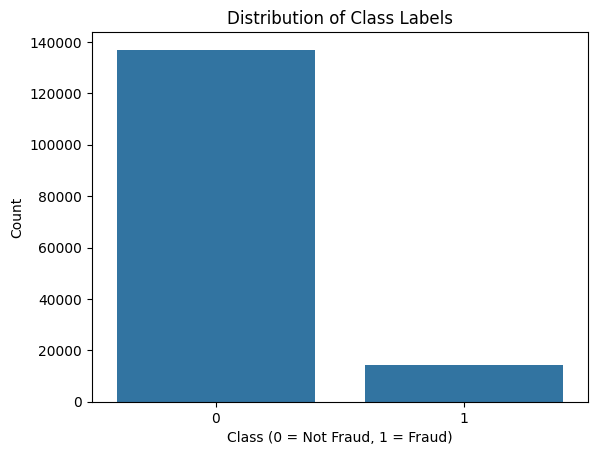

In [11]:
# Count plot of class distribution
sns.countplot(data=fraud, x='class')
plt.title('Distribution of Class Labels')
plt.xlabel('Class (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()


INSIGHT : The class is imbalanced need some adjustment when using prediction or some models which can handle such issue

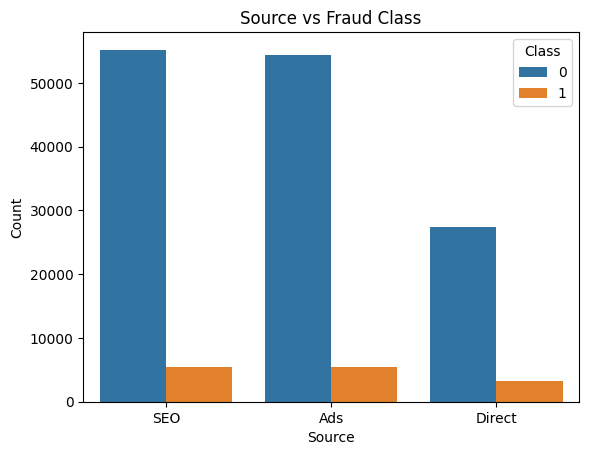

In [12]:
# Count plot of source vs class
sns.countplot(data=fraud, x='source', hue='class')
plt.title('Source vs Fraud Class')
plt.xlabel('Source')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()


In [13]:
fraud['source'].value_counts()

source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64

INSIGHT : Users from Direct have less amount on both classes, while users from SEO and Ads have more amount on both classes.
This could indicate that users from Direct are less likely to be fraudulent, while users from SEO and Ads are more likely to be fraudulent. 

But the direct users data amount is lower than others. So we can not say that direct users are more likely to be fraudlent

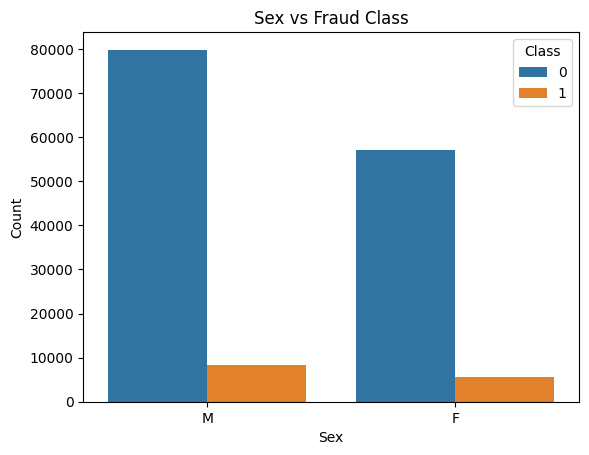

In [14]:
# Count plot of sex vs class
sns.countplot(data=fraud, x='sex', hue='class')
plt.title('Sex vs Fraud Class')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

INSIGHT : Males have a higher proportion from the data. So we can not just say that mens are more likely to commit fraud, but we can say that the data is biased towards 

In [15]:
fraud['sex'].value_counts()

sex
M    88293
F    62819
Name: count, dtype: int64

Merging

In [16]:
country.tail()

,lower_bound_ip_address,upper_bound_ip_address,country
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore
138845,3.758096e+09,3758096383,Australia


In [17]:
fraud[fraud['ip_address'] == '16779264.0']

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class


In [18]:
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.79972,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.865908,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.11095,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443.91396,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.452712,0


In [19]:
import ipaddress

# Convert float to int (drop decimals), then to IP string
fraud['ip_address_int'] = fraud['ip_address'].astype('float').astype('int')
#fraud['ip_address_str'] = fraud['ip_address_int'].apply(lambda x: str(ipaddress.IPv4Address(x)))


In [20]:
fraud['ip_address'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 151112 entries, 0 to 151111
Series name: ip_address
Non-Null Count   Dtype 
--------------   ----- 
151112 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [21]:
fraud['ip_address'].head()

0     732758368.79972
1    350311387.865908
2    2621473820.11095
3    3840542443.91396
4    415583117.452712
Name: ip_address, dtype: object

In [22]:
# Make sure all IPs are integers
fraud['ip_address'] = fraud['ip_address'].astype('float')
country['lower_bound_ip_address'] = country['lower_bound_ip_address'].astype('float')
country['upper_bound_ip_address'] = country['upper_bound_ip_address'].astype('float')

In [23]:
# Merge using interval logic
# For large data, we use merge_asof with sorting
country = country.sort_values(by='lower_bound_ip_address')
fraud = fraud.sort_values(by='ip_address')

# Use merge_asof to find the closest lower_bound less than or equal to the ip_address
merged = pd.merge_asof(
    fraud,
    country,
    left_on='ip_address',
    right_on='lower_bound_ip_address',
    direction='backward'
)

# Filter out rows where ip_address > upper_bound_ip_address (since merge_asof only checks lower bound)
merged = merged[merged['ip_address'] <= merged['upper_bound_ip_address']]
merged.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_address_int,lower_bound_ip_address,upper_bound_ip_address,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,16778864,16778240.0,16779263.0,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,16842045,16809984.0,16842751.0,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,16843656,16843264.0,16843775.0,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,16938732,16924672.0,16941055.0,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,16971984,16941056.0,16973823.0,Thailand


In [24]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129146 entries, 634 to 131728
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   user_id                 129146 non-null  int64         
 1   signup_time             129146 non-null  datetime64[ns]
 2   purchase_time           129146 non-null  datetime64[ns]
 3   purchase_value          129146 non-null  int64         
 4   device_id               129146 non-null  object        
 5   source                  129146 non-null  object        
 6   browser                 129146 non-null  object        
 7   sex                     129146 non-null  object        
 8   age                     129146 non-null  int64         
 9   ip_address              129146 non-null  float64       
 10  class                   129146 non-null  int64         
 11  ip_address_int          129146 non-null  int64         
 12  lower_bound_ip_address  129146 no

Feature Engineering

In [25]:
# Frequency features
freq = merged.groupby('user_id').agg(
    transaction_count=('user_id', 'count'),
    total_amount=('purchase_value', 'sum'),
    avg_amount=('purchase_value', 'mean'),
    first_purchase=('purchase_time', 'min'),
    last_purchase=('purchase_time', 'max')
).reset_index()

# Time span of transactions per user (in days)
freq['activity_span_days'] = (
    (freq['last_purchase'] - freq['first_purchase']).dt.total_seconds() / (3600 * 24)
)

freq['velocity'] = freq['transaction_count'] / freq['activity_span_days'].replace(0, 1e-6)

# Merge back to original dataframe
merged_2 = merged.merge(
    freq[['user_id', 'transaction_count', 'total_amount', 'avg_amount', 'velocity']],
    on='user_id',
    how='left'
)


In [26]:
merged_2.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_address_int,lower_bound_ip_address,upper_bound_ip_address,country,transaction_count,total_amount,avg_amount,velocity
0,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,16778864,16778240.0,16779263.0,Australia,1,47,47.0,1000000.0
1,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,16842045,16809984.0,16842751.0,Thailand,1,15,15.0,1000000.0
2,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,16843656,16843264.0,16843775.0,China,1,44,44.0,1000000.0
3,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,16938732,16924672.0,16941055.0,China,1,55,55.0,1000000.0
4,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,16971984,16941056.0,16973823.0,Thailand,1,51,51.0,1000000.0


In [27]:
merged_2.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'ip_address_int', 'lower_bound_ip_address', 'upper_bound_ip_address',
       'country', 'transaction_count', 'total_amount', 'avg_amount',
       'velocity'],
      dtype='object')

In [28]:
# 1. Hour of Day (from purchase_time)
merged_2['hour_of_day'] = merged_2['purchase_time'].dt.hour

# 2. Day of Week (0=Monday, 6=Sunday)
merged_2['day_of_week'] = merged_2['purchase_time'].dt.dayofweek

# 3. Time Since Signup (in days, or choose seconds/hours)
merged_2['time_since_signup'] = (merged_2['purchase_time'] - merged_2['signup_time']).dt.total_seconds() / (3600 * 24)

# Preview
print(merged_2[['purchase_time', 'hour_of_day', 'day_of_week', 'time_since_signup']].head())

        purchase_time  hour_of_day  day_of_week  time_since_signup
0 2015-08-09 03:57:29            3            6          42.039525
1 2015-02-11 20:28:28           20            2          14.255058
2 2015-04-11 23:41:23           23            5          23.119606
3 2015-05-23 16:40:14           16            5          88.436308
4 2015-11-03 04:04:30            4            1         118.629387


# Handle class imbalance

In [29]:
import pandas

In [33]:
df = merged_2

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129146 entries, 0 to 129145
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   user_id                 129146 non-null  int64         
 1   signup_time             129146 non-null  datetime64[ns]
 2   purchase_time           129146 non-null  datetime64[ns]
 3   purchase_value          129146 non-null  int64         
 4   device_id               129146 non-null  object        
 5   source                  129146 non-null  object        
 6   browser                 129146 non-null  object        
 7   sex                     129146 non-null  object        
 8   age                     129146 non-null  int64         
 9   ip_address              129146 non-null  float64       
 10  class                   129146 non-null  int64         
 11  ip_address_int          129146 non-null  int64         
 12  lower_bound_ip_address  129146

In [36]:
df['signup_timestamp'] = df['signup_time'].astype(int) / 10**9  # seconds
df['purchase_timestamp'] = df['purchase_time'].astype(int) / 10**9

In [37]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Check class distribution
print(Counter(merged_2['class']))

Counter({0: 116878, 1: 12268})


In [42]:
X = df.drop(columns=['signup_time', 'purchase_time', 'class', 'device_id'])
y = df['class']

In [43]:
# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()

In [44]:
print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

Categorical columns: ['source', 'browser', 'sex', 'country']
Numeric columns: ['user_id', 'purchase_value', 'age', 'ip_address', 'ip_address_int', 'lower_bound_ip_address', 'upper_bound_ip_address', 'transaction_count', 'total_amount', 'avg_amount', 'velocity', 'hour_of_day', 'day_of_week', 'time_since_signup', 'signup_timestamp', 'purchase_timestamp']


In [46]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [47]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

In [48]:
X_processed = preprocessor.fit_transform(X)

In [53]:
import numpy as np
# 1. Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

# If X_resampled is sparse (check type)
if hasattr(X_resampled, "toarray"):
    X_resampled = X_resampled.toarray()

In [54]:
# 2. Get feature names from ColumnTransformer
ohe = preprocessor.named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_cols)
num_feature_names = numeric_cols
all_feature_names = list(num_feature_names) + list(cat_feature_names)

# 3. Convert to DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=all_feature_names)

# 4. Add target column
X_resampled_df['class'] = y_resampled
X_resampled_df.head()

,user_id,purchase_value,age,ip_address,ip_address_int,lower_bound_ip_address,upper_bound_ip_address,transaction_count,total_amount,avg_amount,...,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,class
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.549607,0.549607,0.0,-1.231124,1.487911,-0.413800,1.008263,0.664645,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,-1.197335,-1.197335,0.0,1.229002,-0.505034,-1.180852,-1.182488,-1.518365,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.385831,0.385831,0.0,1.663142,0.989675,-0.936126,-0.450875,-0.794408,0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.986342,0.986342,0.0,0.650149,0.989675,0.867086,-0.794479,-0.283797,0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.767974,0.767974,0.0,-1.086411,-1.003270,1.700633,1.145288,1.717574,0


In [56]:
print(X_resampled_df.shape)
X_resampled_df.head()

(233756, 208)


,user_id,purchase_value,age,ip_address,ip_address_int,lower_bound_ip_address,upper_bound_ip_address,transaction_count,total_amount,avg_amount,...,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,class
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.549607,0.549607,0.0,-1.231124,1.487911,-0.413800,1.008263,0.664645,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,-1.197335,-1.197335,0.0,1.229002,-0.505034,-1.180852,-1.182488,-1.518365,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.385831,0.385831,0.0,1.663142,0.989675,-0.936126,-0.450875,-0.794408,0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.986342,0.986342,0.0,0.650149,0.989675,0.867086,-0.794479,-0.283797,0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.767974,0.767974,0.0,-1.086411,-1.003270,1.700633,1.145288,1.717574,0


In [57]:
X_resampled_df['class'].value_counts()

class
0    116878
1    116878
Name: count, dtype: int64

In [68]:
X_resampled_df.to_csv('../Data/processed/X_resampled.csv', index=False)

In [ ]:
#X_resampled_df.drop(columns=['user_id'], inplace=True)

,purchase_value,age,ip_address,ip_address_int,lower_bound_ip_address,upper_bound_ip_address,transaction_count,total_amount,avg_amount,velocity,...,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,class
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.549607,0.549607,0.0,-1.231124,1.487911,-0.413800,1.008263,0.664645,0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-1.197335,-1.197335,0.0,1.229002,-0.505034,-1.180852,-1.182488,-1.518365,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.385831,0.385831,0.0,1.663142,0.989675,-0.936126,-0.450875,-0.794408,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.986342,0.986342,0.0,0.650149,0.989675,0.867086,-0.794479,-0.283797,0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.767974,0.767974,0.0,-1.086411,-1.003270,1.700633,1.145288,1.717574,0


In [69]:
pd.read_csv('../Data/processed/X_resampled.csv').head()

,purchase_value,age,ip_address,ip_address_int,lower_bound_ip_address,upper_bound_ip_address,transaction_count,total_amount,avg_amount,velocity,...,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,class
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.549607,0.549607,0.0,-1.231124,1.487911,-0.413800,1.008263,0.664645,0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-1.197335,-1.197335,0.0,1.229002,-0.505034,-1.180852,-1.182488,-1.518365,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.385831,0.385831,0.0,1.663142,0.989675,-0.936126,-0.450875,-0.794408,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.986342,0.986342,0.0,0.650149,0.989675,0.867086,-0.794479,-0.283797,0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.767974,0.767974,0.0,-1.086411,-1.003270,1.700633,1.145288,1.717574,0
